Ces expérimentations sont basées sur l'ensemble de donnée FrenchEM2_V3.0.csv

In [2]:
from sklearn.svm import SVC
from IPython.display import display
from modAL.models import ActiveLearner
from modAL.uncertainty import margin_sampling
from modAL.uncertainty import entropy_sampling
from modAL.density import information_density
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import ActiveLearning as al
import Dataset_V1

In [3]:
data = Dataset_V1.loadAddressPair()
x_data = data.iloc[:,:34].values
y_data = data['Label'].values

# Représentation des données en 2 dimensions 

In [4]:
x_data = data.iloc[:,:34].values
y_data = data['Label'].values
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)
nb_iterations = 250
n_initial = 100
X_train, y_train, X_pool, y_pool = al.train_dev_split(x_data, y_data, n_initial)
X_poolWithAdd = list(X_pool)
X_pool = X_pool[:,:19].copy()
X_train = X_train[:,:19].copy()

In [203]:
performances , trace = autoAL_traceBis(classifier, margin_sampling,nb_iterations, X_train,y_train, X_pool, y_pool, X_poolWithAdd)

In [7]:
performances , trace = autoAL_traceBis(classifier, entropy_sampling,nb_iterations, X_train,y_train, X_pool, y_pool, X_poolWithAdd)

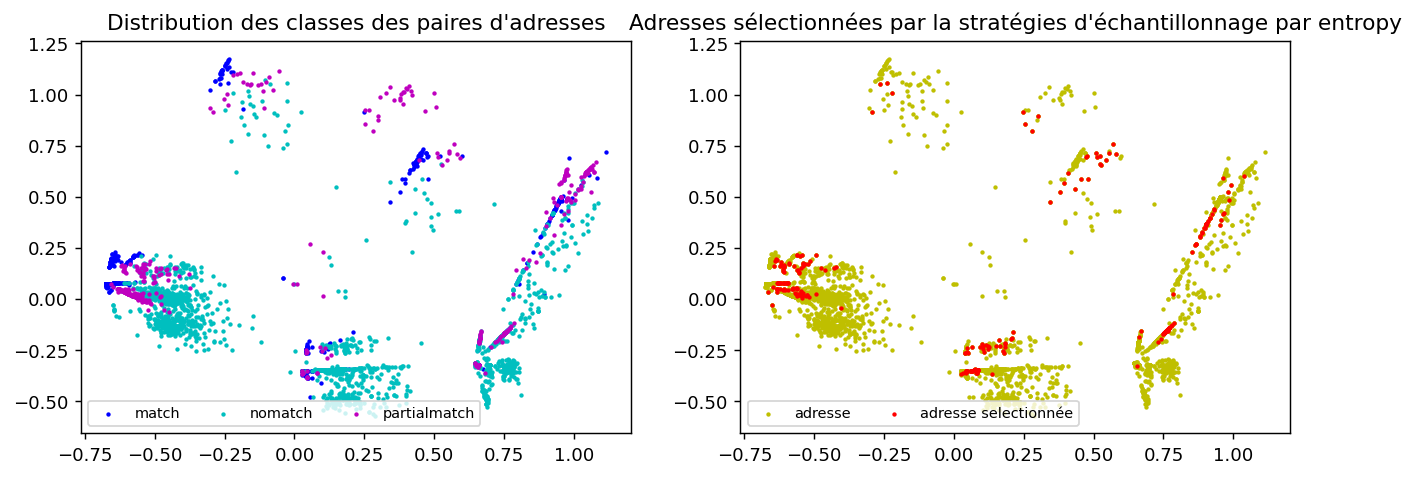

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

x_data = data.iloc[:,0:19].values
x_selected = pd.DataFrame(trace).iloc[:,0:19].values
x_data = np.concatenate((x_data, x_selected), axis=0) 
y_data = data['Label'].values

# Define our PCA transformer and fit it onto our raw dataset.
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(X=x_data)

# Isolate the data we'll need for plotting.
x_component, y_component = transformed_data[:, 0], transformed_data[:, 1]


index_match = np.where(y_data == 2)[0]
index_nomatch = np.where(y_data == 0)[0]
index_partialmatch = np.where(y_data == 1)[0]
index_selected = list(range(len(y_data),len(x_data)))
x_match = x_component[index_match]
y_match = y_component[index_match]
x_nomatch = x_component[index_nomatch]
y_nomatch = y_component[index_nomatch]
x_partialmatch = x_component[index_partialmatch]
y_partialmatch = y_component[index_partialmatch]
x_selected = x_component[index_selected]
y_selected = y_component[index_selected]

plt.figure(figsize=(12, 4), dpi=130)

plt.subplot(121)
match = plt.scatter(x=x_match, y=y_match,s=2,  color='b')
nomatch = plt.scatter(x=x_nomatch, y=y_nomatch, s=2, color='c')
partialmatch = plt.scatter(x=x_partialmatch, y=y_partialmatch,s=2, color='m')
plt.title('Distribution des classes des paires d\'adresses')
plt.legend((match, nomatch, partialmatch),('match', 'nomatch', 'partialmatch'),
           scatterpoints=1,loc='lower left',ncol=3,fontsize=8)

plt.subplot(122)
entire_data = plt.scatter(x=x_component, y=y_component, s=2, color='y')
selected_data = plt.scatter(x=x_selected, y=y_selected, s=2, color='r')
plt.legend((entire_data, selected_data),
           ('adresse', 'adresse selectionnée'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.title('Adresses sélectionnées par la stratégies d\'échantillonnage par entropy')
                           
plt.show()

In [218]:
performances , trace = autoAL_traceBis(classifier, densityEuclidean_sampling,200, X_train,y_train, X_pool, y_pool, X_poolWithAdd)

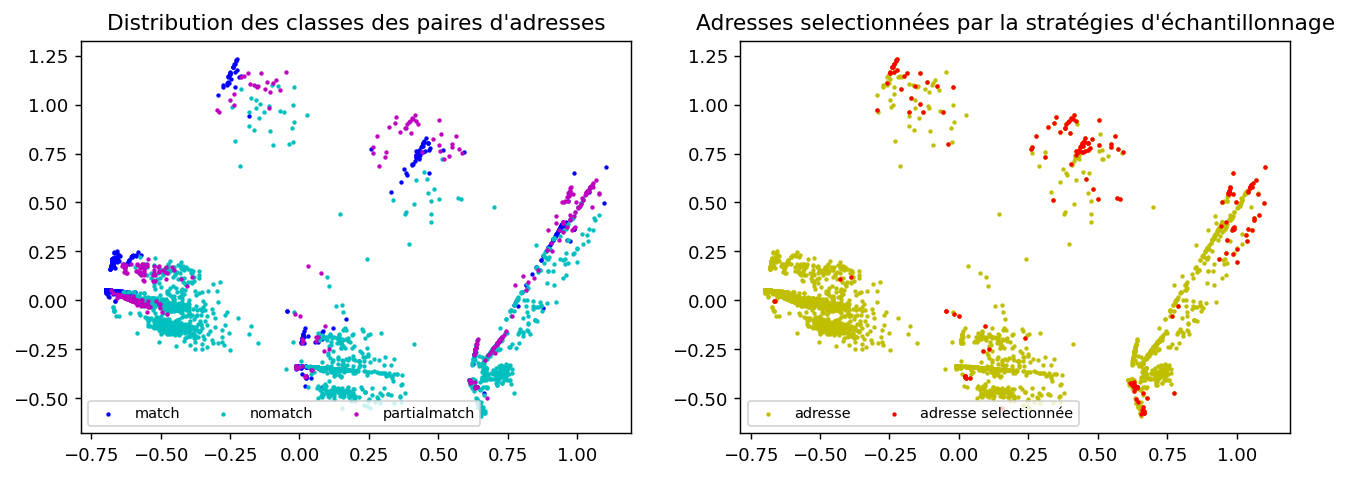

In [219]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

x_data = data.iloc[:,0:19].values
x_selected = pd.DataFrame(trace)
x_data = np.concatenate((x_data, x_selected), axis=0) 
y_data = data['Label'].values

# Define our PCA transformer and fit it onto our raw dataset.
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(X=x_data)

# Isolate the data we'll need for plotting.
x_component, y_component = transformed_data[:, 0], transformed_data[:, 1]


index_match = np.where(y_data == 2)[0]
index_nomatch = np.where(y_data == 0)[0]
index_partialmatch = np.where(y_data == 1)[0]
index_selected = list(range(len(y_data),len(x_data)))
x_match = x_component[index_match]
y_match = y_component[index_match]
x_nomatch = x_component[index_nomatch]
y_nomatch = y_component[index_nomatch]
x_partialmatch = x_component[index_partialmatch]
y_partialmatch = y_component[index_partialmatch]
x_selected = x_component[index_selected]
y_selected = y_component[index_selected]

plt.figure(figsize=(12, 4), dpi=130)

plt.subplot(121)
match = plt.scatter(x=x_match, y=y_match,s=2,  color='b')
nomatch = plt.scatter(x=x_nomatch, y=y_nomatch, s=2, color='c')
partialmatch = plt.scatter(x=x_partialmatch, y=y_partialmatch,s=2, color='m')
plt.title('Distribution des classes des paires d\'adresses')
plt.legend((match, nomatch, partialmatch),('match', 'nomatch', 'partialmatch'),
           scatterpoints=1,loc='lower left',ncol=3,fontsize=8)

plt.subplot(122)
entire_data = plt.scatter(x=x_component, y=y_component, s=2, color='y')
selected_data = plt.scatter(x=x_selected, y=y_selected, s=2, color='r')
plt.legend((entire_data, selected_data),
           ('adresse', 'adresse selectionnée'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.title('Adresses selectionnées par la stratégies d\'échantillonnage')
                           
plt.show()      

# Stocker les données labellisées par l'oracles

In [6]:
import csv

def afficherDonnee(index, X_poolWithAdd):
    lines_indices = ['Address 1', 'Address 2']
    columns = ['INBUILDING','EXTBUILDING','POILOGISTIC','ZONE','HOUSENUM','ROADNAME', 'CITY']
    valuesAdd1, valuesAdd2 = [], []
    for i in range (19, 26):
        valuesAdd1.append(X_poolWithAdd[index][i])
    for i in range (26, 33):
        valuesAdd2.append(X_poolWithAdd[index][i])
    values = [valuesAdd1, valuesAdd2]
    pair = pd.DataFrame(values, index = lines_indices, columns = columns )
    display(pair)
    

#Plutot renvoyer les paires sélectionnées
#Afficher avec une autres méthodes les données 
def manualAL_trace(classifier, sampleRequest, nbIterations, X_train, y_train, X_pool, y_pool, X_poolWithAdd):
    #NE pas définir label ici 
    label = {2:'Match', 1:'Partiel Match', 0:'Non Match'}
    fileName = "PairesSelectionnees.csv"
    selectedPairs = open(fileName, "w",encoding='UTF8')
    obj = csv.writer(selectedPairs)
    obj.writerow(('INBUILDING_1','INBUILDING_2','EXTBUILDING_1','EXTBUILDING_2','POILOGISTIC_1', 'POILOGISTIC_2',
              'ZONE_1', 'ZONE_2','HOUSENUM_1','HOUSENUM_2','ROADNAME_1','ROADNAME_2', 'CITY_1','CITY_2','LABEL'))


    learner = ActiveLearner(estimator=classifier, 
                            query_strategy = sampleRequest,
                            X_training=X_train, 
                            y_training=y_train)
    model_accuracy = learner.score(X_pool, y_pool)
    performance_history = [model_accuracy]
    for index in range(nbIterations):
        query_index, query_instance = learner.query(X_pool)
        X = X_pool[query_index]
        afficherDonnee(int(query_index), X_poolWithAdd)
        y = [float(input('Labellisation : 2: Match , 1: PartialMatch, 0: NoMatch \n'))]
        print(y_pool[query_index])
        learner.teach(X=X, y=y)
        
        pairToWrite = []
        for i in range (19, 26):
            pairToWrite.append(X_poolWithAdd[int(query_index)][i])
            pairToWrite.append(X_poolWithAdd[int(query_index)][i + 7])
        pairToWrite.append(label[y[0]])
        obj.writerow(pairToWrite)
        
        X_pool,  y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index, axis=0)
        X_poolWithAdd = np.delete(X_poolWithAdd, query_index, axis=0)
        model_accuracy = learner.score(X_pool, y_pool)
        performance_history.append(model_accuracy)
    #print('final accuracy = ', model_accuracy)
    selectedPairs.close()
    return performance_history


def autoAL_trace(classifier, sampleRequest, nbIterations, X_train, y_train, X_pool, y_pool,X_poolWithAdd):
    #NE pas définir ici 
    label = {2:'Match', 1:'Partiel Match', 0:'Non Match'}
    
    trace = []
    fileName = "PairesSelectionnees.csv"
    selectedPairs = open(fileName, 'w',encoding='UTF8')
    obj = csv.writer(selectedPairs)
    obj.writerow(('INBUILDING_1','INBUILDING_2','EXTBUILDING_1','EXTBUILDING_2','POILOGISTIC_1', 'POILOGISTIC_2',
              'ZONE_1', 'ZONE_2','HOUSENUM_1','HOUSENUM_2','ROADNAME_1','ROADNAME_2', 'CITY_1','CITY_2','LABEL'))

    learner = ActiveLearner(estimator=classifier, 
                        query_strategy = sampleRequest,
                        X_training=X_train, 
                        y_training=y_train)
    model_accuracy = learner.score(X_pool, y_pool)
    performance_history = [model_accuracy]
    for index in range(nbIterations):
        query_index, query_instance = learner.query(X_pool)
        X, y = X_pool[query_index], y_pool[query_index].reshape(1, )
        learner.teach(X=X, y=y)
        
        trace.append(X_poolWithAdd[int(query_index)])
        
        pairToWrite = []
        for i in range (19, 26):
            pairToWrite.append(X_poolWithAdd[int(query_index)][i])
            pairToWrite.append(X_poolWithAdd[int(query_index)][i + 7])
        pairToWrite.append(label[y[0]])
        obj.writerow(pairToWrite)
        
        X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)
        X_poolWithAdd = np.delete(X_poolWithAdd, query_index, axis=0)
        model_accuracy = learner.score(X_pool, y_pool)
        performance_history.append(model_accuracy)
    selectedPairs.close()
    return performance_history, trace 


def autoAL_traceBis(classifier, sampleRequest, nbIterations, X_train, y_train, X_pool, y_pool, X_poolWithAdd):
    learner = ActiveLearner(estimator=classifier, 
                        query_strategy = sampleRequest,
                        X_training=X_train, 
                        y_training=y_train)
    model_accuracy = learner.score(X_pool, y_pool)
    performance_history = [model_accuracy]
    trace = []
    for index in range(nbIterations):
        query_index, query_instance = learner.query(X_pool)
        X, y = X_pool[query_index], y_pool[query_index].reshape(1, )
        learner.teach(X=X, y=y)
        trace.append(query_instance[0])
        X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)
        model_accuracy = learner.score(X_pool, y_pool)
        performance_history.append(model_accuracy)
    return performance_history, trace

Automatique

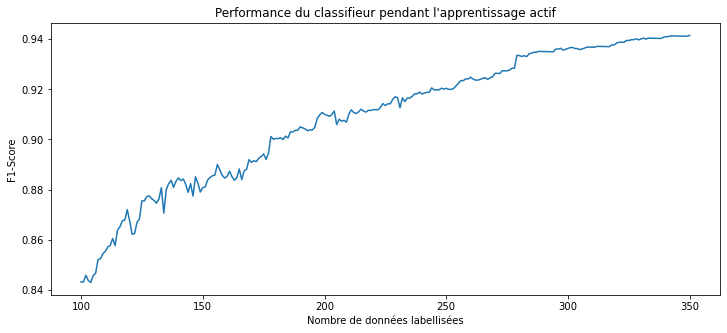

,INBUILDING_1,INBUILDING_2,EXTBUILDING_1,EXTBUILDING_2,POILOGISTIC_1,POILOGISTIC_2,ZONE_1,ZONE_2,HOUSENUM_1,HOUSENUM_2,ROADNAME_1,ROADNAME_2,CITY_1,CITY_2,LABEL
0,NONE,NONE,NONE,BATIMENT NEPTUNE FRANCE,NONE,NONE,ZONE ARTISANALE CDG,NONE,6,4,RUE MERMOZ,PLACE BERLIN,TREMBLAY EN,TREMBLAY EN,Non Match
1,NONE,NONE,NONE,NONE,NONE,NONE,CAMMAS GRZES,NONE,NONE,NONE,NONE,LIEU DIT CAMMAS GREZES,CARCASSONNE,CARCASSONNE,Partiel Match
2,NONE,NONE,NONE,NONE,NONE,NONE,ZONE ARTISANALE,ZONE ARTISANALE COUSTELIERES,NONE,114,NONE,RUE MANADE,CASTRIES,CASTRIES,Partiel Match
3,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,165,165,AVENUE RIBOT,AVENUE RIBOT REY HAUT ROUTE VARETZ,BRIVE,BRIVE,Match
4,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,19,19,RUE MONTROBERT,RUE GARE RDC,VILLENAUXE,VILLENAUXE,Non Match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,NONE,NONE,NONE,NONE,NONE,NONE,NONE,PARC ACTIVITERC INDUSTRIEL VERTONNE,40,50,AVENUE VERTONE,AVENUE VERTONNE,VERTOU,VERTOU,Partiel Match
246,NONE,NONE,LOTISSEMENT JACQUARIAS,NONE,NONE,MENUISERIE CHARPENTE BOISEENE,NONE,NONE,NONE,14,NONE,RUE CRUAUDIERE MCB,ST JEAN VERGES,SAINT JEAN BOISEAU,Non Match
247,NONE,NONE,NONE,NONE,NONE,NONE,ZONE INDUSTRIELLE CENTRE INTERNATIONAL FRT,ZONE FRET,NONE,NONE,NONE,RUE BERTRAND BALGUERIE,BRUGES,BRUGES,Partiel Match
248,NONE,NONE,NONE,NONE,NONE,NONE,NONE,ZONE INDUSTRIELLE MARQUISIE,73,NONE,AVENUE MAILLARD,AVENUE 4 JUILLET 1776,BRIVE,BRIVE,Non Match


In [121]:
x_data = data.iloc[:,:34].values
y_data = data['Label'].values

classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)
nb_iterations = 250
n_initial = 100

X_train, y_train, X_pool, y_pool = al.train_dev_split(x_data, y_data, n_initial)
X_poolWithAdd = list(X_pool)
X_pool = X_pool[:,:19].copy()
X_train = X_train[:,:19].copy()

performances , trace = autoAL_trace(classifier, margin_sampling,nb_iterations, X_train,y_train, X_pool, y_pool, X_poolWithAdd)

plt.figure(figsize=(12, 5))
plt.title('Performance du classifieur pendant l\'apprentissage actif')
plt.plot(range(n_initial, n_initial+nb_iterations+1), performances)
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.show()

selectedData = pd.read_csv('PairesSelectionnees.csv',sep=',')
display(selectedData)

Manuel

,INBUILDING,EXTBUILDING,POILOGISTIC,ZONE,HOUSENUM,ROADNAME,CITY
Address 1,NONE,NONE,AROPORT NICE CTE D'AZUR,NONE,NONE,NONE,NICE
Address 2,NONE,BATIMENT G,NONE,PARC ACTIVITERC RELFETS PARC ACTIVITERIS NORD II,165,AVENUE BOIS PIE,ROISSY EN FRANCE


Labellisation : 2: Match , 1: PartialMatch, 0: NoMatch 
1
[0]


,INBUILDING,EXTBUILDING,POILOGISTIC,ZONE,HOUSENUM,ROADNAME,CITY
Address 1,NONE,NONE,AROPORT NICE CTE D'AZUR,NONE,NONE,NONE,NICE
Address 2,NONE,BATIMENT 3626,NONE,ZONE FRET NO 2,2,RUE PIED SEC,TREMBLAY EN FRANCE


Labellisation : 2: Match , 1: PartialMatch, 0: NoMatch 
2
[0]


,INBUILDING,EXTBUILDING,POILOGISTIC,ZONE,HOUSENUM,ROADNAME,CITY
Address 1,NONE,NONE,NONE,ZONE ARTISANALEC PLAYES,NONE,RUE TECHNOLOGIES,SIX FOURS PLAGES
Address 2,NONE,NONE,NONE,ZONE ARTISANALE PLAYES,NONE,NONE,SIX FOURS PLAGES


Labellisation : 2: Match , 1: PartialMatch, 0: NoMatch 
0
[1]


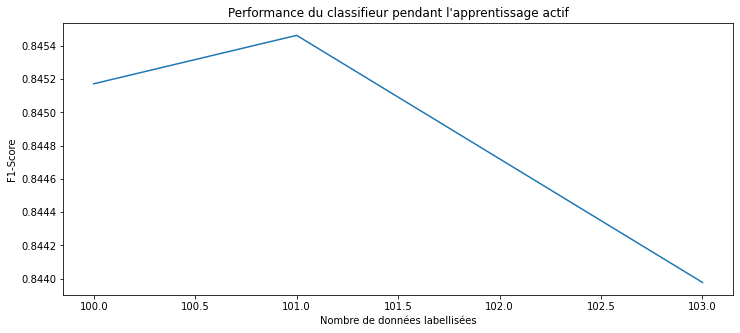

,N° PAIRE,INBUILDING_1,INBUILDING_2,EXTBUILDING_1,EXTBUILDING_2,POILOGISTIC_1,POILOGISTIC_2,ZONE_1,ZONE_2,HOUSENUM_1,HOUSENUM_2,ROADNAME_1,ROADNAME_2,CITY_1,CITY_2,LABEL
0,1,NONE,NONE,NONE,BATIMENT G,AROPORT NICE CTE D'AZUR,NONE,NONE,PARC ACTIVITERC RELFETS PARC ACTIVITERIS NORD II,NONE,165,NONE,AVENUE BOIS PIE,NICE,ROISSY EN FRANCE,Partiel Match
1,2,NONE,NONE,NONE,BATIMENT 3626,AROPORT NICE CTE D'AZUR,NONE,NONE,ZONE FRET NO 2,NONE,2,NONE,RUE PIED SEC,NICE,TREMBLAY EN FRANCE,Match
2,3,NONE,NONE,NONE,NONE,NONE,NONE,ZONE ARTISANALEC PLAYES,ZONE ARTISANALE PLAYES,NONE,NONE,RUE TECHNOLOGIES,NONE,SIX FOURS PLAGES,SIX FOURS PLAGES,Non Match


In [32]:
x_data = data.iloc[:,:34].values
y_data = data['Label'].values

classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)
nb_iterations = 3
n_initial = 100

X_train, y_train, X_pool, y_pool = al.train_dev_split(x_data, y_data, n_initial)
X_poolWithAdd = list(X_pool)
X_pool_manual = X_pool[:,:19].copy()
X_train_manual = X_train[:,:19].copy()
y_pool_manual = y_pool.copy()
y_train_manual = y_train.copy()

performances = manualAL_trace(classifier, margin_sampling,nb_iterations, X_train_manual,y_train_manual, X_pool_manual, y_pool_manual, X_poolWithAdd)

plt.figure(figsize=(12, 5))
plt.title('Performance du classifieur pendant l\'apprentissage actif')
plt.plot(range(n_initial, n_initial+nb_iterations+1), performances)
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.show()

selectedData = pd.read_csv('PairesSelectionnees.csv',sep=',')
selectedData.head()

# Autres stratégies d'échantillonnage

Densité

In [217]:
def density_sampling(classifier, X_pool, metric):
    n_samples = len(X_pool)
    density = information_density(X_pool, metric)
    query_idx = 0
    min_density = density[0]
    for i in range(n_samples):
        if(density[i] < min_density):
            min_density = density[i]
            query_idx = i
    return [query_idx]

def densityCosine_sampling(classifier, X_pool):
    return density_sampling(classifier, X_pool, 'cosine')
    
def densityEuclidean_sampling(classifier, X_pool):
    return density_sampling(classifier, X_pool, 'euclidean')

def densityCorrelation_sampling(classifier, X_pool):
    return density_sampling(classifier, X_pool, 'correlation')
    
def densityManhattan_sampling(classifier, X_pool):
    return density_sampling(classifier, X_pool, 'manhattan')
    
def densityPrecomputed_sampling(classifier, X_pool):
    return density_sampling(classifier, X_pool, 'precomputed')
    
def autoAL(classifier, sampleRequest, nbIterations, X_train, y_train, X_pool, y_pool):
    learner = ActiveLearner(estimator=classifier, 
                        query_strategy = sampleRequest,
                        X_training=X_train, 
                        y_training=y_train)
    model_accuracy = learner.score(X_pool, y_pool)
    performance_history = [model_accuracy]
    for index in range(nbIterations):
        query_index, query_instance = learner.query(X_pool)
        print(y_pool, y_pool.shape, query_index, y_pool[query_index])
        return
        X, y = X_pool[query_index], y_pool[query_index].reshape(1, )
        learner.teach(X=X, y=y)
        X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)
        model_accuracy = learner.score(X_pool, y_pool)
        performance_history.append(model_accuracy)
    return performance_history

Valid metrics are ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski', 'nan_euclidean', 'haversine'], or 'precomputed', or a callable

In [6]:
nb_iterations = 250
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)
X_raw = data.iloc[:,:19].values
y_raw = data['Label'].values

nb_initial_labeled_data = 10
X_train, y_train, X_pool, y_pool = al.train_dev_split(X_raw, y_raw, nb_initial_labeled_data) 
performance_history10M = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history10E = al.autoAL(classifier, entropy_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history10DE = al.autoAL(classifier, densityEuclidean_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history10DC = al.autoAL(classifier, densityCosine_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history10DCorr = al.autoAL(classifier, densityCorrelation_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history10DM = al.autoAL(classifier, densityManhattan_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
#performance_history10DP = al.autoAL(classifier, densityPrecomputed_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)

nb_initial_labeled_data = 30
X_train, y_train, X_pool, y_pool = al.train_dev_split(X_raw, y_raw, nb_initial_labeled_data) 
performance_history30M = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history30E = al.autoAL(classifier, entropy_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history30DE = al.autoAL(classifier, densityEuclidean_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history30DC = al.autoAL(classifier, densityCosine_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history30DCorr = al.autoAL(classifier, densityCorrelation_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history30DM = al.autoAL(classifier, densityManhattan_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
#performance_history30DP = al.autoAL(classifier, densityPrecomputed_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)

nb_initial_labeled_data = 50
X_train, y_train, X_pool, y_pool = al.train_dev_split(X_raw, y_raw, nb_initial_labeled_data)
performance_history50M = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history50E = al.autoAL(classifier, entropy_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history50DE = al.autoAL(classifier, densityEuclidean_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history50DC = al.autoAL(classifier, densityCosine_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history50DCorr = al.autoAL(classifier, densityCorrelation_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history50DM = al.autoAL(classifier, densityManhattan_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
#performance_history50DP = al.autoAL(classifier, densityPrecomputed_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)

nb_initial_labeled_data = 100
X_train, y_train, X_pool, y_pool = al.train_dev_split(X_raw, y_raw, nb_initial_labeled_data)
performance_history100M = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history100E = al.autoAL(classifier, entropy_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history100DE = al.autoAL(classifier, densityEuclidean_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history100DC = al.autoAL(classifier, densityCosine_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history100DCorr = al.autoAL(classifier, densityCorrelation_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history100DM = al.autoAL(classifier, densityManhattan_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
#performance_history100DP = al.autoAL(classifier, densityPrecomputed_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)

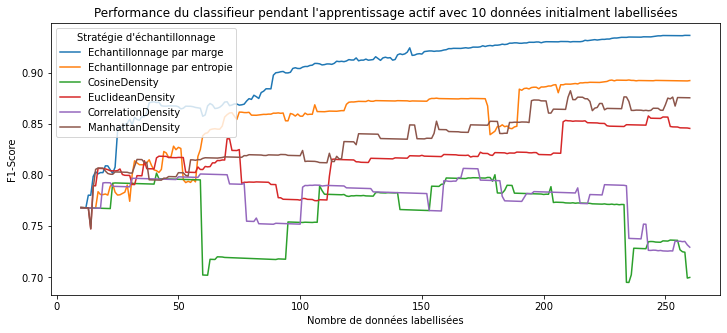

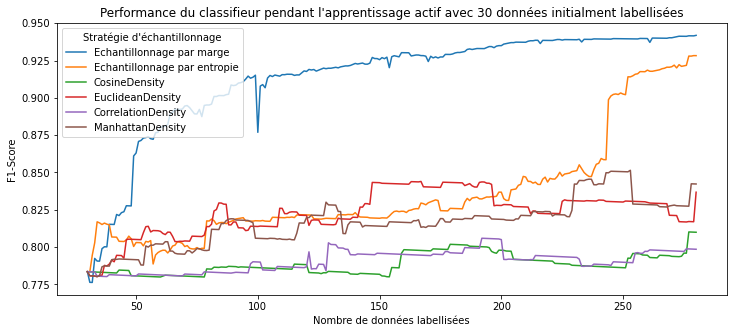

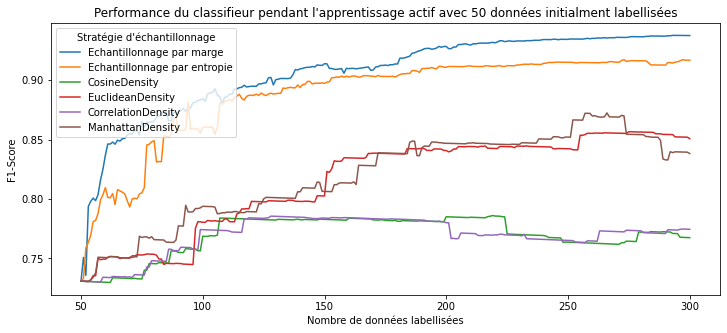

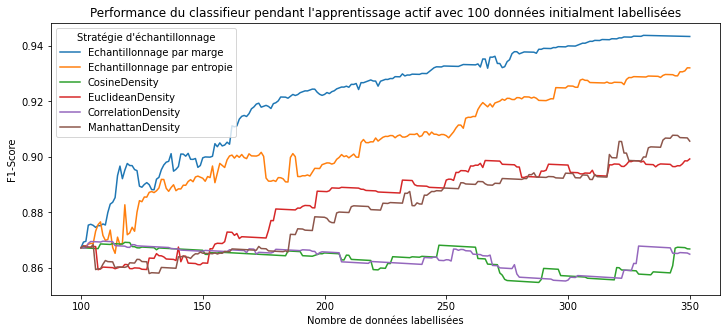

In [7]:
plt.figure(figsize=(12, 5))
plt.title('Performance du classifieur pendant l\'apprentissage actif avec 10 données initialment labellisées')
plt.plot(range(10, 10+nb_iterations+1), performance_history10M, label='Echantillonnage par marge')
plt.plot(range(10, 10+nb_iterations+1), performance_history10E, label='Echantillonnage par entropie')
plt.plot(range(10, 10+nb_iterations+1), performance_history10DC, label='CosineDensity')
plt.plot(range(10, 10+nb_iterations+1), performance_history10DE, label='EuclideanDensity')
plt.plot(range(10, 10+nb_iterations+1), performance_history10DCorr, label='CorrelationDensity')
plt.plot(range(10, 10+nb_iterations+1), performance_history10DM, label='ManhattanDensity')
plt.legend(title = 'Stratégie d\'échantillonnage')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.show()

plt.figure(figsize=(12, 5))
plt.title('Performance du classifieur pendant l\'apprentissage actif avec 30 données initialment labellisées')
plt.plot(range(30, 30+nb_iterations+1), performance_history30M, label='Echantillonnage par marge')
plt.plot(range(30, 30+nb_iterations+1), performance_history30E, label='Echantillonnage par entropie')
plt.plot(range(30, 30+nb_iterations+1), performance_history30DC, label='CosineDensity')
plt.plot(range(30, 30+nb_iterations+1), performance_history30DE, label='EuclideanDensity')
plt.plot(range(30, 30+nb_iterations+1), performance_history30DCorr, label='CorrelationDensity')
plt.plot(range(30, 30+nb_iterations+1), performance_history30DM, label='ManhattanDensity')
plt.legend(title = 'Stratégie d\'échantillonnage')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.show()

plt.figure(figsize=(12, 5))
plt.title('Performance du classifieur pendant l\'apprentissage actif avec 50 données initialment labellisées')
plt.plot(range(50, 50+nb_iterations+1), performance_history50M, label='Echantillonnage par marge')
plt.plot(range(50, 50+nb_iterations+1), performance_history50E, label='Echantillonnage par entropie')
plt.plot(range(50, 50+nb_iterations+1), performance_history50DC, label='CosineDensity')
plt.plot(range(50, 50+nb_iterations+1), performance_history50DE, label='EuclideanDensity')
plt.plot(range(50, 50+nb_iterations+1), performance_history50DCorr, label='CorrelationDensity')
plt.plot(range(50, 50+nb_iterations+1), performance_history50DM, label='ManhattanDensity')
plt.legend(title = 'Stratégie d\'échantillonnage')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.show()

plt.figure(figsize=(12, 5))
plt.title('Performance du classifieur pendant l\'apprentissage actif avec 100 données initialment labellisées')
plt.plot(range(100, 100+nb_iterations+1), performance_history100M, label='Echantillonnage par marge')
plt.plot(range(100, 100+nb_iterations+1), performance_history100E, label='Echantillonnage par entropie')
plt.plot(range(100, 100+nb_iterations+1), performance_history100DC, label='CosineDensity')
plt.plot(range(100, 100+nb_iterations+1), performance_history100DE, label='EuclideanDensity')
plt.plot(range(100, 100+nb_iterations+1), performance_history100DCorr, label='CorrelationDensity')
plt.plot(range(100, 100+nb_iterations+1), performance_history100DM, label='ManhattanDensity')
plt.legend(title = 'Stratégie d\'échantillonnage')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.show()

Conclusion des comparaison des stratégies de requête:
Les stratégies basées sur l'incertitude permettent d'obtenir des performances du modèle beaucoup plus élevées que les stratégies basées sur la densité. C'était prévisible étant 

# Taille de l'ensemble d'apprentissage et stratégie d'échantillonnage

In [14]:
nbIterations = 400
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)
X_raw = data.iloc[:,:19].values
y_raw = data['Label'].values

nb_initial_labeled_data = 10
X_train, y_train, X_pool, y_pool = al.train_dev_split(X_raw, y_raw, nb_initial_labeled_data)
performance_history10M = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history10E = al.autoAL(classifier, entropy_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)

nb_initial_labeled_data = 30
X_train, y_train, X_pool, y_pool = al.train_dev_split(X_raw, y_raw, nb_initial_labeled_data)
performance_history30M = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history30E = al.autoAL(classifier, entropy_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)

nb_initial_labeled_data = 50
X_train, y_train, X_pool, y_pool = al.train_dev_split(X_raw, y_raw, nb_initial_labeled_data)
performance_history50M = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history50E = al.autoAL(classifier, entropy_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)

nb_initial_labeled_data = 100
X_train, y_train, X_pool, y_pool = al.train_dev_split(X_raw, y_raw, nb_initial_labeled_data)
performance_history100M = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
performance_history100E = al.autoAL(classifier, entropy_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)

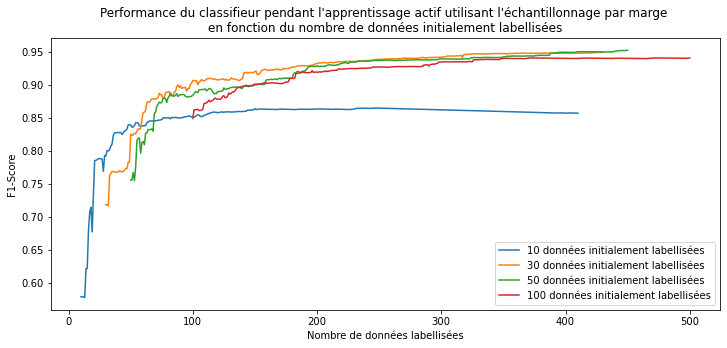

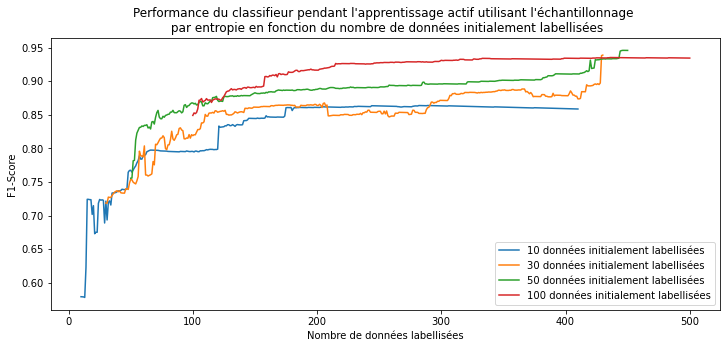

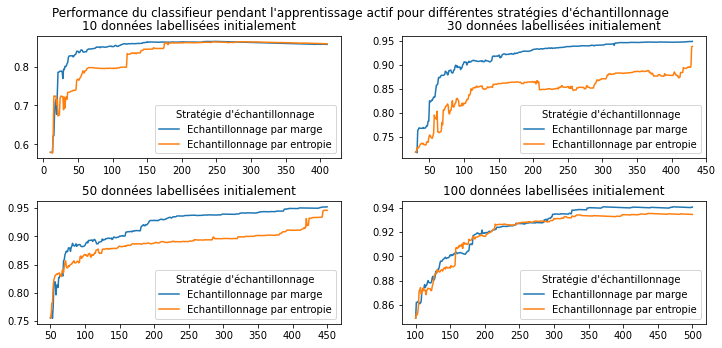

In [17]:
#Plot Margin 
plt.figure(figsize=(12, 5))
plt.title('Performance du classifieur pendant l\'apprentissage actif utilisant l\'échantillonnage par marge \nen fonction du nombre de données initialement labellisées')
plt.plot(range(10, 10+nbIterations+1), performance_history10M, label='10 données initialement labellisées')
plt.plot(range(30, 30+nbIterations+1), performance_history30M, label='30 données initialement labellisées')
plt.plot(range(50, 50+nbIterations+1), performance_history50M, label='50 données initialement labellisées')
plt.plot(range(100, 100+nbIterations+1), performance_history100M, label='100 données initialement labellisées')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

#Plot Entropy
plt.figure(figsize=(12, 5))
plt.title('Performance du classifieur pendant l\'apprentissage actif utilisant l\'échantillonnage \n par entropie en fonction du nombre de données initialement labellisées')
plt.plot(range(10, 10+nbIterations+1), performance_history10E, label='10 données initialement labellisées')
plt.plot(range(30, 30+nbIterations+1), performance_history30E, label='30 données initialement labellisées')
plt.plot(range(50, 50+nbIterations+1), performance_history50E, label='50 données initialement labellisées')
plt.plot(range(100, 100+nbIterations+1), performance_history100E, label='100 données initialement labellisées')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

#Plot Margin vs Entropy
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(12,5), sharex=False)
fig.suptitle('Performance du classifieur pendant l\'apprentissage actif pour différentes stratégies d\'échantillonnage')
ax1.plot(range(10, 10+nbIterations+1), performance_history10M, label='Echantillonnage par marge')
ax1.plot(range(10, 10+nbIterations+1), performance_history10E, label='Echantillonnage par entropie')
ax2.plot(range(30, 30+nbIterations+1), performance_history30M, label='Echantillonnage par marge')
ax2.plot(range(30, 30+nbIterations+1), performance_history30E, label='Echantillonnage par entropie')
ax3.plot(range(50, 50+nbIterations+1), performance_history50M, label='Echantillonnage par marge')
ax3.plot(range(50, 50+nbIterations+1), performance_history50E, label='Echantillonnage par entropie')
ax4.plot(range(100, 100+nbIterations+1), performance_history100M, label='Echantillonnage par marge')
ax4.plot(range(100, 100+nbIterations+1), performance_history100E, label='Echantillonnage par entropie')
ax1.set_title('10 données labellisées initialement')
ax2.set_title('30 données labellisées initialement')
ax3.set_title('50 données labellisées initialement')
ax4.set_title('100 données labellisées initialement')
ax1.legend(title='Stratégie d\'échantillonnage')
ax2.legend(title='Stratégie d\'échantillonnage')
ax3.legend(title='Stratégie d\'échantillonnage')
ax4.legend(title='Stratégie d\'échantillonnage')
plt.subplots_adjust(left=0.125,bottom=0.1, right=0.9, 
                    top=0.9, wspace=0.2, hspace=0.35)
plt.show()

# Taille de l'ensemble de test

In [ ]:
que les performances du modèle estimées à partir de 10\% des données sont aussi proche des performances estimées sur 100\% des données que celles estimées sur 30\% des données initiales.

In [74]:
X_raw = data.iloc[:,:19].values
y_raw = data['Label'].values
nb_iterations = 400
n_initial = 50

test_size = 300
performance_historyTest300 = np.zeros(shape=nb_iterations+1)
performance_historyRef300 = np.zeros(shape=nb_iterations+1)
for i in range(0,10):
    X_train, y_train,X_test, y_test, X_pool, y_pool = al.train_dev_test_split(X_raw, y_raw, n_initial, test_size)
    X_pool = X_pool[:,:19]
    X_train = X_train[:,:19]
    X_test = X_test[:,:19]
    performanceTest = al.autoAL_test(classifier, margin_sampling,nb_iterations, X_train, y_train,X_test, y_test, X_pool, y_pool)
    performanceRef = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
    performance_historyTest300 = np.add(performance_historyTest300, np.array(performanceTest))
    performance_historyRef300 = np.add(performance_historyRef300, np.array(performanceRef))
performance_historyTest300 = performance_historyTest300/10
performance_historyRef300 = performance_historyRef300/10

    
test_size = 600
performance_historyTest600 = np.zeros(shape=nb_iterations+1)
performance_historyRef600 = np.zeros(shape=nb_iterations+1)
for i in range(0,10):
    X_train, y_train,X_test, y_test, X_pool, y_pool = al.train_dev_test_split(X_raw, y_raw, n_initial, test_size)
    X_pool = X_pool[:,:19]
    X_train = X_train[:,:19]
    X_test = X_test[:,:19]
    performanceTest = al.autoAL_test(classifier, margin_sampling,nb_iterations, X_train, y_train,X_test, y_test, X_pool, y_pool)
    performanceRef = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
    performance_historyTest600 = np.add(performance_historyTest600, np.array(performanceTest))
    performance_historyRef600 = np.add(performance_historyRef600, np.array(performanceRef))
performance_historyTest600 = performance_historyTest600/10
performance_historyRef600 = performance_historyRef600/10

test_size = 900
performance_historyTest900 = np.zeros(shape=nb_iterations+1)
performance_historyRef900 = np.zeros(shape=nb_iterations+1)
for i in range(0,10):
    X_train, y_train,X_test, y_test, X_pool, y_pool = al.train_dev_test_split(X_raw, y_raw, n_initial, test_size)
    X_pool = X_pool[:,:19]
    X_train = X_train[:,:19]
    X_test = X_test[:,:19]
    performanceTest = al.autoAL_test(classifier, margin_sampling,nb_iterations, X_train, y_train,X_test, y_test, X_pool, y_pool)
    performanceRef = al.autoAL(classifier, margin_sampling,nb_iterations, X_train, y_train, X_pool, y_pool)
    performance_historyTest900 = np.add(performance_historyTest900, np.array(performanceTest))
    performance_historyRef900 = np.add(performance_historyRef900, np.array(performanceRef))
performance_historyTest900 = performance_historyTest900/10
performance_historyRef900 = performance_historyRef900/10

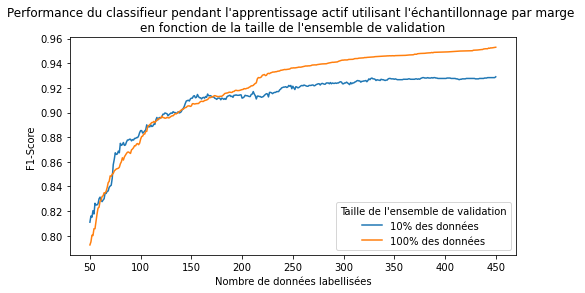

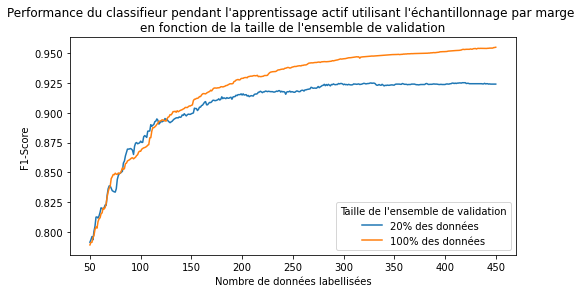

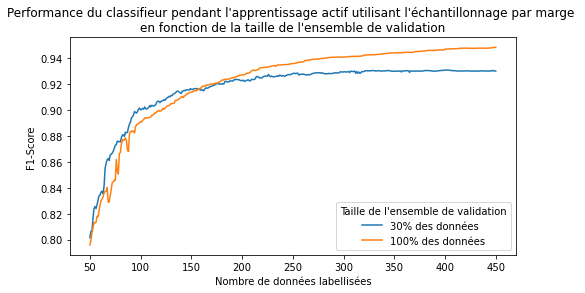

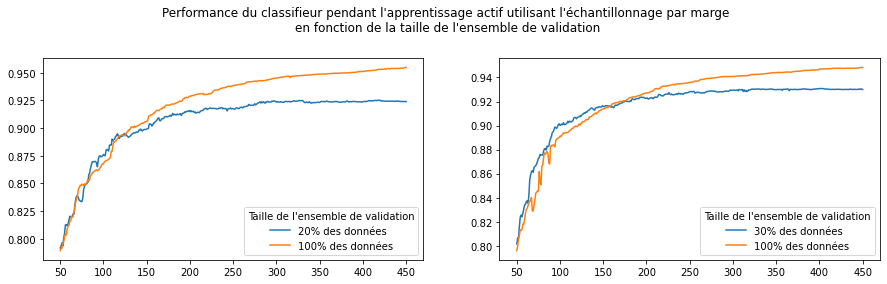

In [92]:
plt.figure(figsize=(8, 4))
plt.title('Performance du classifieur pendant l\'apprentissage actif utilisant l\'échantillonnage par marge \nen fonction de la taille de l\'ensemble de validation')
plt.plot(range(50, 50+nb_iterations+1), performance_historyTest300, label='10% des données')
plt.plot(range(50, 50+nb_iterations+1), performance_historyRef300, label='100% des données')
plt.legend(title='Taille de l\'ensemble de validation')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.show()

plt.figure(figsize=(8, 4))
plt.title('Performance du classifieur pendant l\'apprentissage actif utilisant l\'échantillonnage par marge \nen fonction de la taille de l\'ensemble de validation')
plt.plot(range(50, 50+nb_iterations+1), performance_historyTest600, label='20% des données')
plt.plot(range(50, 50+nb_iterations+1), performance_historyRef600, label='100% des données')
plt.legend(title='Taille de l\'ensemble de validation')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.show()


plt.figure(figsize=(8, 4))
plt.title('Performance du classifieur pendant l\'apprentissage actif utilisant l\'échantillonnage par marge \nen fonction de la taille de l\'ensemble de validation')
plt.plot(range(50, 50+nb_iterations+1), performance_historyTest900, label='30% des données')
plt.plot(range(50, 50+nb_iterations+1), performance_historyRef900, label='100% des données')
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.legend(title='Taille de l\'ensemble de validation')
plt.show()


#Plot Margin vs Entropy
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(15,4), sharex=False)
fig.suptitle('Performance du classifieur pendant l\'apprentissage actif utilisant l\'échantillonnage par marge \nen fonction de la taille de l\'ensemble de validation')
ax1.plot(range(50, 50+nb_iterations+1), performance_historyTest600, label='20% des données')
ax1.plot(range(50, 50+nb_iterations+1), performance_historyRef600, label='100% des données')
ax2.plot(range(50, 50+nb_iterations+1), performance_historyTest900, label='30% des données')
ax2.plot(range(50, 50+nb_iterations+1), performance_historyRef900, label='100% des données')
ax1.legend(title='Taille de l\'ensemble de validation')
ax2.legend(title='Taille de l\'ensemble de validation')
plt.subplots_adjust(left=0.125,bottom=0.1, right=0.9, 
                    top=0.8, wspace=0.2, hspace=0.35)
plt.show()

# Critère d'arrêt : Seuil de différence de performance

In [3]:
def autoAL_PerfStability(classifier, sampleRequest, nbPredictions, seuilStabilite, X_train, y_train,X_test,y_test, X_pool, y_pool):
    
    learner = ActiveLearner(estimator=classifier, 
                        query_strategy = sampleRequest,
                        X_training=X_train, 
                        y_training=y_train)
    
    model_accuracy = learner.score(X_test, y_test)
    performance_history = [model_accuracy]
    while len(X_pool > 0):
        query_index, query_instance = learner.query(X_pool)
        X, y = X_pool[query_index], y_pool[query_index].reshape(1, )
        learner.teach(X=X, y=y)
        X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)
        model_accuracy = learner.score(X_test, y_test)
        performance_history.append(model_accuracy)
        if(len(performance_history) >nbPredictions and perfStability(performance_history[-nbPredictions:], seuilStabilite)):
            break
    return performance_history

def perfStability(performances, seuilStabilite):
    meanStability = 0
    count = 0
    for i in range(0,len(performances)-1):
        for j in range(i+1,len(performances)):
            count +=1
            meanStability += abs(performances[i] - performances[j])
    meanStability /= count
    return (meanStability <= seuilStabilite)         

In [4]:
x_data = data.iloc[:,:34].values
y_data = data['Label'].values

n_initial = 50
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)
test_size = 600
nb_iterations = 400
nb_iterForStability = 30
perfDiff = 0.001

X_train, y_train,X_test, y_test, X_pool, y_pool = al.train_dev_test_split(x_data, y_data, n_initial, test_size)
X_pool = X_pool[:,:19]
X_train = X_train[:,:19]
X_test = X_test[:,:19]
performance_SPerf001 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 0.001, X_train, y_train,X_test,y_test, X_pool, y_pool)
performance_SPerf01 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 0.01, X_train, y_train,X_test,y_test, X_pool, y_pool)
performance_SPerf1 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 1, X_train, y_train,X_test,y_test, X_pool, y_pool)

performance_Iter = al.autoAL_test(classifier, margin_sampling,nb_iterations, X_train, y_train,X_test, y_test, X_pool, y_pool)


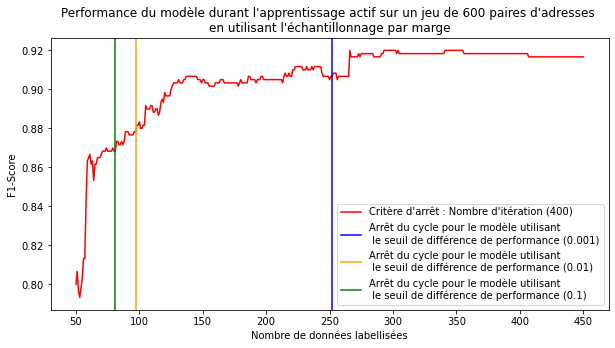

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Performance du modèle durant l\'apprentissage actif sur un jeu de 600 paires d\'adresses \n' +
          'en utilisant l\'échantillonnage par marge')
#plt.plot(range(n_initial, n_initial+len(performance_SPerf001)-1+1), performance_SPerf001, label='Seuil de différence de performance (0.001)')
#plt.plot(range(n_initial, n_initial+len(performance_SPerf01)-1+1), performance_SPerf01, label='Seuil de différence de performance (0.01)')
#plt.plot(range(n_initial, n_initial+len(performance_SPerf1)-1+1), performance_SPerf1, label='Seuil de différence de performance (0.1)')
plt.plot(range(n_initial, n_initial+len(performance_Iter)-1+1), performance_Iter, color='red', label ='Critère d\'arrêt : Nombre d\'itération (400)')
plt.axvline(x = len(performance_SPerf001) +50, color = "blue", label="Arrêt du cycle pour le modèle utilisant \n le seuil de différence de performance (0.001)") # Plotting a single vertical line
plt.axvline(x = len(performance_SPerf01) +50, color = "orange", label="Arrêt du cycle pour le modèle utilisant \n le seuil de différence de performance (0.01)") # Plotting a single vertical line
plt.axvline(x = len(performance_SPerf1) + 50, color = "green", label="Arrêt du cycle pour le modèle utilisant \n le seuil de différence de performance (0.1)") # Plotting a single vertical line

plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

In [94]:
x_data = data.iloc[:,:34].values
y_data = data['Label'].values

n_initial = 50
test_size = 600
nb_iterations = 400
nb_iterForStability = 20
perfDiff = 0.001
labellisationCost001 = []
labellisationCost01 = []
labellisationCost05 = []
labellisationCost1 = []
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)

X_train, y_train,X_test, y_test, X_pool, y_pool = al.train_dev_test_split(x_data, y_data, n_initial, test_size)
X_pool = X_pool[:,:19].copy()
X_train = X_train[:,:19].copy()
X_test = X_test[:,:19].copy()
y_test = y_test.copy()
y_pool = y_pool.copy()
y_train = y_train.copy()
performance_Iter = al.autoAL_test(classifier, margin_sampling,nb_iterations, X_train, y_train,X_test, y_test, X_pool, y_pool)

for i in range(0,10):
    performance_SPerf001 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 0.001, X_train, y_train,X_test,y_test, X_pool, y_pool)
    performance_SPerf05 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 0.05, X_train, y_train,X_test,y_test, X_pool, y_pool)
    performance_SPerf01 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 0.01, X_train, y_train,X_test,y_test, X_pool, y_pool)
    performance_SPerf1 = autoAL_PerfStability(classifier, margin_sampling,nb_iterForStability, 0.1, X_train, y_train,X_test,y_test, X_pool, y_pool)
    
    labellisationCost001.append(len(performance_SPerf001) + n_initial)
    labellisationCost01.append(len(performance_SPerf01) + n_initial)    
    labellisationCost05.append(len(performance_SPerf05) + n_initial)    
    labellisationCost1.append(len(performance_SPerf1) + n_initial)
print(labellisationCost001)
print(labellisationCost01)
print(labellisationCost05)
print(labellisationCost1)

[340, 211, 353, 318, 241, 317, 241, 244, 361, 279]
[71, 75, 90, 93, 79, 89, 98, 104, 96, 90]
[71, 71, 71, 71, 71, 71, 71, 71, 71, 71]
[71, 71, 71, 71, 71, 71, 71, 71, 71, 71]


In [67]:
print(sum(labellisationCost1)/10)
print(performance_Iter[int(sum(labellisationCost1)/10)])

81.0
0.8833333333333333


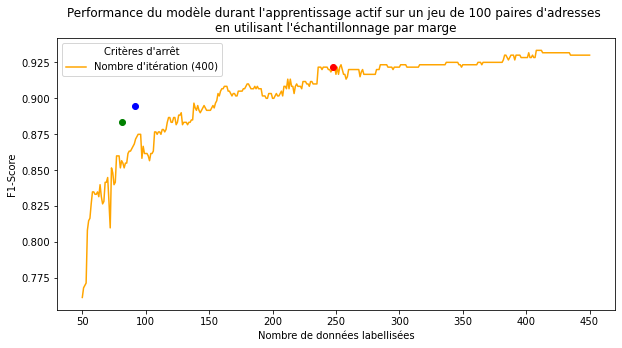

In [70]:
plt.figure(figsize=(10, 5))
plt.title('Performance du modèle durant l\'apprentissage actif sur un jeu de 100 paires d\'adresses \n' +
          'en utilisant l\'échantillonnage par marge')
plt.plot(range(n_initial, n_initial+len(performance_Iter)-1+1),performance_Iter, color='orange', label='Nombre d\'itération (400)')
plt.plot(sum(labellisationCost001)/10,performance_Iter[int(sum(labellisationCost001)/10)], marker = 'o', color = "red")
plt.plot(sum(labellisationCost01)/10,performance_Iter[int(sum(labellisationCost01)/10)], marker = 'o', color = "blue")
plt.plot(sum(labellisationCost1)/10,performance_Iter[int(sum(labellisationCost1)/10)], marker = 'o', color = "green")
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.legend(title='Critères d\'arrêt')
plt.show()

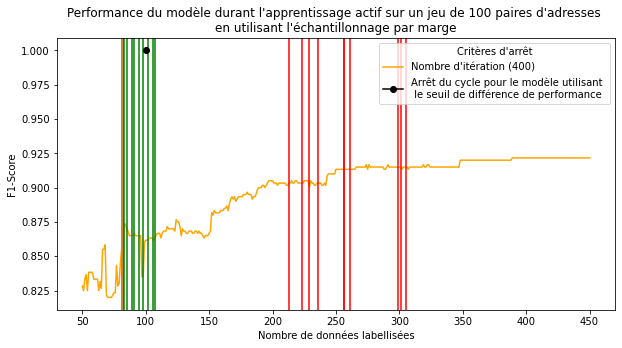

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Performance du modèle durant l\'apprentissage actif sur un jeu de 100 paires d\'adresses \n' +
          'en utilisant l\'échantillonnage par marge')
plt.plot(range(n_initial, n_initial+len(performance_Iter)-1+1),performance_Iter, color='orange', label='Nombre d\'itération (400)')
for i in range(0,10):
    plt.axvline(x = labellisationCost001[i], color = "red") # Plotting a single vertical line
    plt.axvline(x = labellisationCost01[i], color = "green") # Plotting a single vertical line
    plt.axvline(x = labellisationCost1[i], color = "blue") # Plotting a single vertical line
    plt.axvline(x = labellisationCost05[i], color = "orange") # Plotting a single vertical line
plt.plot(100,1, marker="o", color="black",label = "Arrêt du cycle pour le modèle utilisant \n le seuil de différence de performance") # Plotting a single vertical line
plt.xlabel('Nombre de données labellisées')
plt.ylabel('F1-Score')
plt.legend(title='Critères d\'arrêt')
plt.show()

# Critère d'arrêt stabilité de prédiction

In [44]:
def autoAL_PredStability(classifier, sampleRequest, nbPredictions, seuilStabilite, X_train, y_train,X_test,y_test, X_pool, y_pool):
    
    learner = ActiveLearner(estimator=classifier, 
                        query_strategy = sampleRequest,
                        X_training=X_train, 
                        y_training=y_train)
    
    predictionsList = []
    for i in range(0, nbPredictions):
        predictionsList.append([])
    predictionsList[-2] = classifier.predict(X_test)
    model_accuracy = learner.score(X_pool, y_pool)
    performance_history = [model_accuracy]
    stability_history = []
    stabilityIterations = 0

    while len(X_pool > 0) and stabilityIterations < 50:
        query_index, query_instance = learner.query(X_pool)
        X, y = X_pool[query_index], y_pool[query_index].reshape(1, )
        learner.teach(X=X, y=y)
        X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)
        model_accuracy = learner.score(X_pool, y_pool)
        performance_history.append(model_accuracy)
        predictionsList[-1] = classifier.predict(X_test)
        isStable, stability = predictionStability(predictionsList, seuilStabilite)
        stability_history.append(stability)
        for i in range(0, len(predictionsList)-2):
            predictionsList[i] = predictionsList[i+1]
        if(isStable):
            stabilityIterations += 1
        else:
            stabilityIterations = 0
    return performance_history, stability_history

def predictionStability(predictionsList, seuilStabilite):
    meanStability = 0
    count = 0
    for i in range(0,len(predictionsList)-1):
        for j in range(i+1,len(predictionsList)):
            count +=1
            meanStability += stability(predictionsList[i], predictionsList[j], seuilStabilite)
    meanStability /= count
    return (meanStability >= seuilStabilite), meanStability

def stability(lastPredictions, currentPredictions, seuilStabilite):
    if(len(lastPredictions) == 0  or len(currentPredictions) == 0):
        return 0;
    nbPredictions = len(lastPredictions) 
    nb_samePredictions = np.equal(lastPredictions,currentPredictions).sum()
    stability = nb_samePredictions / nbPredictions
    return stability

In [46]:
x_data = data.iloc[:,:34].values
y_data = data['Label'].values

n_initial = 100
nb_iterations = 100
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)

test_size = 600
X_train, y_train,X_test, y_test, X_pool, y_pool = al.train_dev_test_split(x_data, y_data, n_initial, test_size)
X_pool = X_pool[:,:19]
X_train = X_train[:,:19]
X_test = X_test[:,:19]

performance_history , stability_history = autoAL_PredStability(classifier, margin_sampling,30, 0.97, X_train, y_train,X_test,y_test, X_pool, y_pool)

Data distribution {'Match': 931, 'NoMatch': 1652, 'PartialMatch': 417}


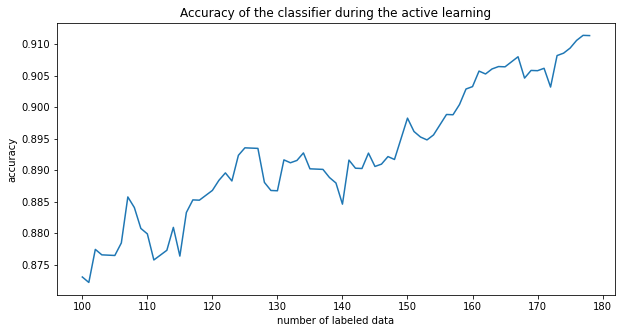

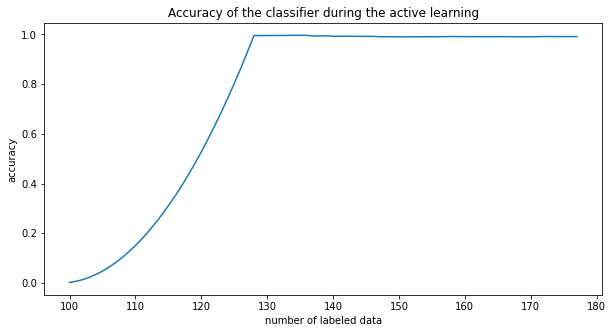

In [47]:
plt.figure(figsize=(10, 5))
plt.title('Accuracy of the classifier during the active learning')
plt.plot(range(n_initial, n_initial+len(performance_history)-1+1), performance_history)
plt.xlabel('number of labeled data')
plt.ylabel('accuracy')
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Accuracy of the classifier during the active learning')
plt.plot(range(n_initial, n_initial+len(stability_history)-1+1), stability_history)
plt.xlabel('number of labeled data')
plt.ylabel('accuracy')
plt.show()